<a href="https://colab.research.google.com/github/enriquegomeztagle/MCD-DataVisualization/blob/main/Clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet -U mplsoccer statsbombpy ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import display, HTML

display(HTML('''
    <button onclick="Jupyter.notebook.kernel.restart()">🔄 Reiniciar Kernel</button>
'''))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X = np.linspace(3,15,4)
Y = np.linspace(4,27,4)

In [5]:
combs=[]
for i in X:
  for j in Y:
    combs.append((i,j))

In [6]:
len(combs)

16

In [7]:
datos=pd.DataFrame(combs,columns=['X','Y'])
datos

,X,Y
0,3.0,4.000000
1,3.0,11.666667
2,3.0,19.333333
3,3.0,27.000000
4,7.0,4.000000
5,7.0,11.666667
6,7.0,19.333333
7,7.0,27.000000
8,11.0,4.000000
9,11.0,11.666667


In [8]:
datos = pd.DataFrame(combs, columns=['X', 'Y'])
datos=datos.round(3)
datos["Color"]=["Red" if n%2==0 else "Blue" for n in range(len(datos))]
datos

,X,Y,Color
0,3.0,4.000,Red
1,3.0,11.667,Blue
2,3.0,19.333,Red
3,3.0,27.000,Blue
4,7.0,4.000,Red
5,7.0,11.667,Blue
6,7.0,19.333,Red
7,7.0,27.000,Blue
8,11.0,4.000,Red
9,11.0,11.667,Blue


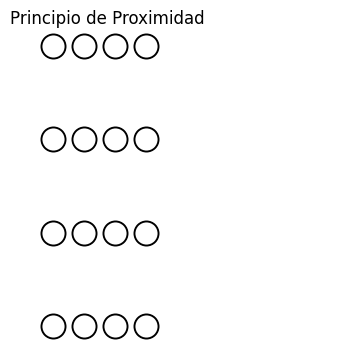

In [9]:
fig, axs = plt.subplots(figsize=(4,4))
sns.scatterplot(x="X", y="Y",
                color="White",
                s=300, ec="Black",
                data=datos,
                ax=axs)

axs.set_xlim(0,40)
plt.axis("off")
plt.xlabel("")
plt.ylabel("")
plt.title("Principio de Proximidad", x=0.25)
plt.show()

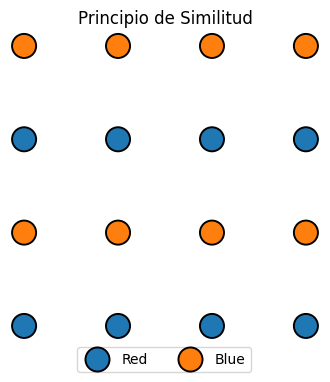

In [10]:
# Principio de Similitud
fig, axs = plt.subplots(figsize=(4,4))
sns.scatterplot(x="X", y="Y",
                hue="Color",
                s=300, ec="Black",
                data=datos,
                ax=axs)

plt.axis("off")
plt.xlabel("")
plt.ylabel("")
plt.title("Principio de Similitud")
plt.legend(bbox_to_anchor=(0.8,0), ncols=2)
plt.show()

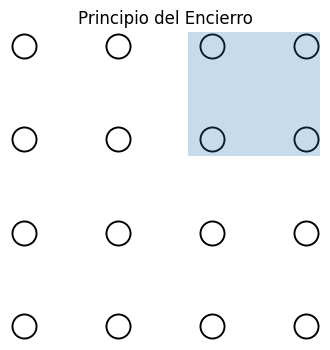

In [11]:
# Principio del Encierro
# https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
from matplotlib.patches import Rectangle
r = Rectangle((10,18), 10, 15, alpha=0.25)
fig, axs = plt.subplots(figsize=(4,4))
sns.scatterplot(x="X", y="Y",
                color="White",
                s=300, ec="Black",
                data=datos,
                ax=axs)

axs.add_patch(r)
plt.axis("off")
plt.xlabel("")
plt.ylabel("")
plt.title("Principio del Encierro")
plt.show()

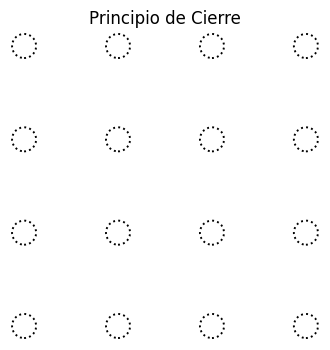

In [12]:
# Principio de Cierre
fig, axs = plt.subplots(figsize=(4,4))
sns.scatterplot(x="X", y="Y",
                color="White",
                s=300, ec="Black",
                data=datos,
                ax=axs, linestyle=":")

plt.axis("off")
plt.xlabel("")
plt.ylabel("")
plt.title("Principio de Cierre")
plt.show()

<img src="https://cdn.prod.website-files.com/620d42e86cb8ec4d0839e59d/620d42e96cb8ec659e39f462_99bf70d46cc247be878de9d3a88f0c44.png" width=600>


<img src="https://raw.githubusercontent.com/statsbomb/logos/main/HudlStatsbomb_Python_Dark.svg" width=800>


In [13]:
# %pip install statsbombpy

In [14]:
from statsbombpy import sb

In [15]:
sb.competitions().competition_name.unique()

/Users/enriquegomeztagle/anaconda3/envs/stats/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [16]:
# Llaves para la siguiente base de datos: competition_id, season_id
comp = sb.competitions()
comp = comp[comp["competition_name"] == "Champions League"]
comp.head(2)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [17]:
comp.iloc[15,:2]

competition_id     16
season_id         277
Name: 18, dtype: object

In [18]:
partidos = sb.matches(competition_id=16, season_id=37)
partidos

/Users/enriquegomeztagle/anaconda3/envs/stats/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated,last_updated_360,match_week,competition_stage,stadium,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,2302764,2005-05-25,None,Europe - Champions League,2004/2005,AC Milan,Liverpool,3,3,available,...,2021-04-01T06:18:57.459032,2021-06-13T16:17:31.694,1,Final,Atatürk Olimpiyat Stadı,,,1.1.0,2,2


In [19]:
liv_mil = sb.events(match_id=2302764)
liv_mil.shape

/Users/enriquegomeztagle/anaconda3/envs/stats/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


(4648, 97)

In [20]:
# Filas -> Acciones
# Cols -> Tipo de acción
liv_mil.iloc[10:13,:]

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AC Milan,243,00:00:00.000,Half Start,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Liverpool,24,00:00:00.000,Half Start,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Liverpool,24,00:00:00.683,Pass,NaN


In [21]:
liv_mil.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pa

In [22]:
# Columnas: location, minute, pass_end_location, pass_recipient, period, player, team
cols = ['player', 'pass_recipient','team', 'minute', 'location' , 'pass_end_location', 'period', "type"]
pases = liv_mil[cols]
pases[~pases.location.isna()]

,player,pass_recipient,team,minute,location,pass_end_location,period,type
12,Milan Baroš,Harry Kewell,Liverpool,0,"[61.0, 40.1]","[59.7, 39.8]",1,Pass
13,Harry Kewell,Steven Gerrard,Liverpool,0,"[59.4, 40.0]","[53.6, 43.2]",1,Pass
14,Steven Gerrard,Djimi Traoré,Liverpool,0,"[53.1, 43.9]","[44.6, 12.1]",1,Pass
15,Djimi Traoré,Milan Baroš,Liverpool,0,"[44.6, 12.1]","[75.7, 25.5]",1,Pass
16,Andrea Pirlo,Ricardo Izecson dos Santos Leite,AC Milan,0,"[44.4, 54.6]","[56.0, 62.4]",1,Pass
...,...,...,...,...,...,...,...,...
4638,Xabier Alonso Olano,NaN,Liverpool,52,"[19.1, 65.0]",NaN,2,50/50
4639,Milan Baroš,NaN,Liverpool,66,"[52.5, 40.6]",NaN,2,50/50
4640,Andrea Pirlo,NaN,AC Milan,66,"[67.6, 39.5]",NaN,2,50/50
4641,Jerzy Dudek,NaN,Liverpool,69,"[4.6, 39.1]",NaN,2,Error


In [23]:
XY=pases.location.apply(pd.Series)
X1Y1=pases.pass_end_location.apply(pd.Series)
pases=pd.concat([pases, XY,X1Y1], axis=1)
pases.columns=cols+['X', 'Y','X1','Y1']
pases

,player,pass_recipient,team,minute,location,pass_end_location,period,type,X,Y,X1,Y1
0,NaN,NaN,AC Milan,0,NaN,NaN,1,Starting XI,NaN,NaN,NaN,NaN
1,NaN,NaN,Liverpool,0,NaN,NaN,1,Starting XI,NaN,NaN,NaN,NaN
2,NaN,NaN,AC Milan,0,NaN,NaN,1,Half Start,NaN,NaN,NaN,NaN
3,NaN,NaN,Liverpool,0,NaN,NaN,1,Half Start,NaN,NaN,NaN,NaN
4,NaN,NaN,AC Milan,45,NaN,NaN,2,Half Start,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4643,Jamie Carragher,NaN,Liverpool,111,NaN,NaN,4,Player Off,NaN,NaN,NaN,NaN
4644,NaN,NaN,AC Milan,104,"[50.4, 44.5]",NaN,3,Referee Ball-Drop,50.4,44.5,NaN,NaN
4645,Vladimir Smicer,NaN,Liverpool,105,NaN,NaN,3,Player On,NaN,NaN,NaN,NaN
4646,Jamie Carragher,NaN,Liverpool,111,NaN,NaN,4,Player On,NaN,NaN,NaN,NaN


In [24]:
pases.player.unique()

array([nan, 'Milan Baroš', 'Harry Kewell', 'Steven Gerrard',
       'Djimi Traoré', 'Andrea Pirlo', 'Ricardo Izecson dos Santos Leite',
       'Marcos Evangelista de Moraes', 'Ivan Gennaro Gattuso',
       'Clarence Seedorf', 'Sami Hyypiä', 'Steve Finnan',
       'Xabier Alonso Olano', 'Jamie Carragher',
       'Luis Javier García Sanz', 'Nelson de Jesus da Silva',
       'Paolo Maldini', 'Alessandro Nesta', 'Jerzy Dudek', 'Jaap Stam',
       'Andriy Shevchenko', 'John Arne Semundseth Riise',
       'Hernán Jorge Crespo', 'Vladimir Smicer', 'Dietmar Hamann',
       'Claudio Santos', 'Jon Dahl Tomasson', 'Djibril Cissé',
       'Rui Manuel César Costa'], dtype=object)

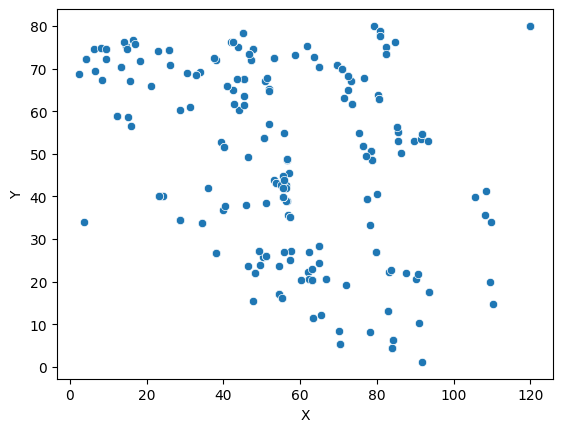

In [25]:
# No olvides el contexto
sns.scatterplot(x="X", y="Y", data=pases[pases.player == 'Steven Gerrard'])
plt.show()

In [26]:
# https://mplsoccer.readthedocs.io/en/latest/installation.html
# %pip install -U mplsoccer

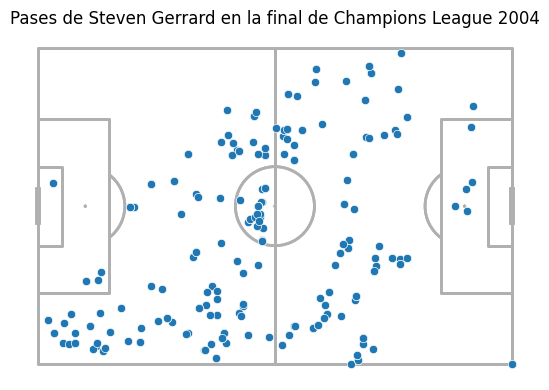

In [27]:
from mplsoccer import Pitch
pitch = Pitch()
fig, axs = pitch.draw(figsize=(8,4))
pitch.draw(ax=axs)
sns.scatterplot(x="X", y="Y", data=pases[pases.player == 'Steven Gerrard'], ax=axs)
plt.title("Pases de Steven Gerrard en la final de Champions League 2004")
plt.show()

In [28]:
def Player_passes(player_name, period):
  try:
    tiempo = {1:"Primer", 2:"Segundo", 3:"Primer Tiempo Extra", 4:"Segundo Tiempo Extra"}
    pitch = Pitch()
    fig, axs = pitch.draw(figsize=(8,4))
    pitch.draw(ax=axs)
    sns.scatterplot(x="X", y="Y", data=pases[(pases.player == player_name) & (pases.period == period)], ax=axs)
    plt.title("Pases de {} en el período {} de la \n final de Champions League 2004".format(player_name, tiempo[period]))
    plt.show()
  except:
    print("No se encontraron pases de este jugador en este período")

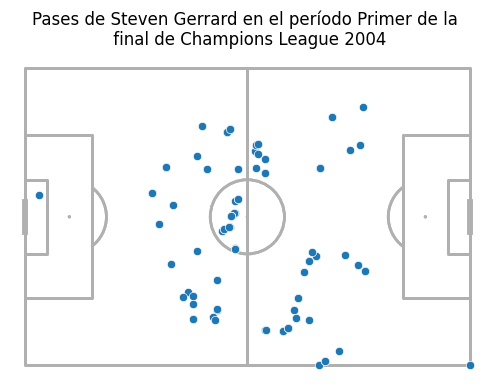

In [29]:
Player_passes('Steven Gerrard', 1)

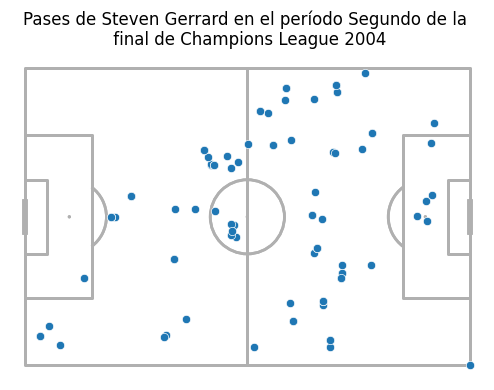

In [30]:
Player_passes('Steven Gerrard', 2)

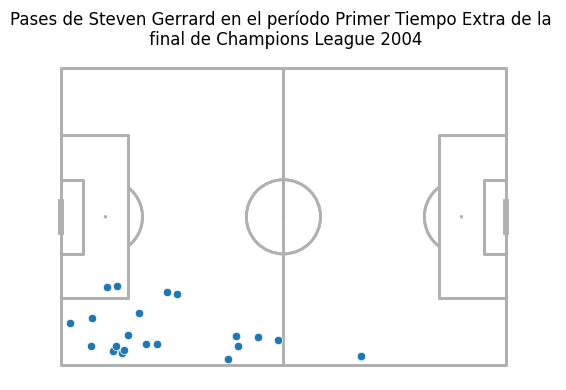

In [31]:
Player_passes('Steven Gerrard', 3)

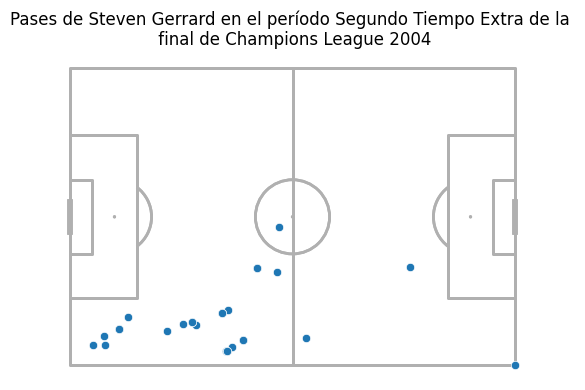

In [32]:
Player_passes('Steven Gerrard', 4)

In [33]:
# %pip install -U ipywidgets

In [34]:
from ipywidgets import interact
# Quitando NaNs
valid_players = pases.player.dropna().unique()
valid_periods = pases.period.dropna().unique()

interact(Player_passes, player_name=valid_players, period=valid_periods)
plt.show()

interactive(children=(Dropdown(description='player_name', options=('Milan Baroš', 'Harry Kewell', 'Steven Gerr…

In [36]:
def Player_passes(player_name, period):
  try:
    tiempo = {1:"Primer", 2:"Segundo", 3:"Primer Tiempo Extra", 4:"Segundo Tiempo Extra"}
    color={"Liverpool": "Red", "AC Milan": "White"}
    pitch = Pitch()
    fig, axs = pitch.draw(figsize=(8,4))
    pitch.draw(ax=axs)
    sns.scatterplot(x="X", y="Y", color=color[pases[pases.player==player_name].team.unique()[0]], data=pases[(pases.player==player_name) & (pases.period==period)], ax=axs)
    plt.title("Pases de {} en el período {} de la \n final de Champions League 2004".format(player_name, tiempo[period]))
    plt.show()
  except:
    print("No se encontraron pases de este jugador en este período")

In [37]:
from ipywidgets import interact
# Quitando NaNs
valid_players = pases.player.dropna().unique()
valid_periods = pases.period.dropna().unique()

interact(Player_passes, player_name=valid_players, period=valid_periods)
plt.show()

interactive(children=(Dropdown(description='player_name', options=('Milan Baroš', 'Harry Kewell', 'Steven Gerr…

In [38]:
def Player_passes(player_name, period):
    try:
        tiempo = {1: "Primer Tiempo", 2: "Segundo Tiempo", 3: "Primer TE", 4: "Segundo TE", 5: "Penales"}
        color = {"Liverpool": "Red", "AC Milan": "White"}

        data = pases[
            (pases.player == player_name) &
            (pases.period == period) &
            (pases.type == "Pass")
        ]

        if data.empty:
            print("No se encontraron pases de {} en {}.".format(player_name, tiempo[int(period)]))
            return

        team_color = color[data.team.unique()[0]]

        pitch = Pitch()
        fig, axs = pitch.draw(figsize=(8, 4))
        pitch.draw(ax=axs)

        sns.scatterplot(x="X", y="Y", color=team_color,
                        ec="Black", s=50, data=data, ax=axs)

        plt.title("Pases de {} en la\nfinal de la Champions League 2004\n{} tiempo".format(
            player_name, tiempo[int(period)]))

        for n in range(len(data)):
            axs.annotate("",
                         xy=(data["X1"].iloc[n], data["Y1"].iloc[n]),
                         xytext=(data["X"].iloc[n], data["Y"].iloc[n]),
                         arrowprops={"color": "Black", "width": 1})

        plt.show()

    except Exception as e:
        print("Error al mostrar los pases de {}: {}".format(player_name, e))

In [39]:
from ipywidgets import interact
# Quitando NaNs
valid_players = pases.player.dropna().unique()
valid_periods = pases.period.dropna().unique()

interact(Player_passes, player_name=valid_players, period=valid_periods)
plt.show()

interactive(children=(Dropdown(description='player_name', options=('Milan Baroš', 'Harry Kewell', 'Steven Gerr…

In [40]:
tiradores = pases[pases.period == 5].player.unique()
tiradores

array([nan, 'Claudio Santos', 'Dietmar Hamann', 'Andrea Pirlo',
       'Djibril Cissé', 'Jon Dahl Tomasson', 'John Arne Semundseth Riise',
       'Ricardo Izecson dos Santos Leite', 'Vladimir Smicer',
       'Jerzy Dudek', 'Nelson de Jesus da Silva'], dtype=object)

In [41]:
penales = pases[pases.period == 5]
penales

,player,pass_recipient,team,minute,location,pass_end_location,period,type,X,Y,X1,Y1
10,NaN,NaN,AC Milan,120,NaN,NaN,5,Half Start,NaN,NaN,NaN,NaN
11,NaN,NaN,Liverpool,120,NaN,NaN,5,Half Start,NaN,NaN,NaN,NaN
4174,Claudio Santos,NaN,AC Milan,120,"[108.2, 40.1]",NaN,5,Shot,108.2,40.1,NaN,NaN
4175,Dietmar Hamann,NaN,Liverpool,120,"[107.9, 40.1]",NaN,5,Shot,107.9,40.1,NaN,NaN
4176,Andrea Pirlo,NaN,AC Milan,121,"[107.9, 40.1]",NaN,5,Shot,107.9,40.1,NaN,NaN
4177,Djibril Cissé,NaN,Liverpool,122,"[107.8, 40.0]",NaN,5,Shot,107.8,40.0,NaN,NaN
4178,Jon Dahl Tomasson,NaN,AC Milan,123,"[107.9, 40.0]",NaN,5,Shot,107.9,40.0,NaN,NaN
4179,John Arne Semundseth Riise,NaN,Liverpool,124,"[108.0, 40.1]",NaN,5,Shot,108.0,40.1,NaN,NaN
4180,Ricardo Izecson dos Santos Leite,NaN,AC Milan,125,"[108.1, 40.0]",NaN,5,Shot,108.1,40.0,NaN,NaN
4181,Vladimir Smicer,NaN,Liverpool,125,"[108.1, 40.0]",NaN,5,Shot,108.1,40.0,NaN,NaN


In [42]:
porteros = ["Jerzy Dudek", "Nelson de Jesus da Silva"]
penales_porteros = penales[penales['player'].isin(porteros)]
# https://github.com/statsbomb/open-data/issues/49
# https://github.com/statsbomb/open-data/issues/34
penales_porteros

,player,pass_recipient,team,minute,location,pass_end_location,period,type,X,Y,X1,Y1
4226,Jerzy Dudek,NaN,Liverpool,120,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN
4227,Nelson de Jesus da Silva,NaN,AC Milan,120,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN
4228,Jerzy Dudek,NaN,Liverpool,121,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN
4229,Nelson de Jesus da Silva,NaN,AC Milan,122,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN
4230,Jerzy Dudek,NaN,Liverpool,123,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN
4231,Nelson de Jesus da Silva,NaN,AC Milan,124,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN
4232,Jerzy Dudek,NaN,Liverpool,125,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN
4233,Nelson de Jesus da Silva,NaN,AC Milan,125,"[1.0, 40.0]",NaN,5,Goal Keeper,1.0,40.0,NaN,NaN


In [43]:
penales_porteros["type"].unique()

array(['Goal Keeper'], dtype=object)

In [44]:
pases['X'] = pd.to_numeric(pases['X'], errors='coerce')
pases['Y'] = pd.to_numeric(pases['Y'], errors='coerce')

mask_penales_porteros = (pases['type'] == 'Goal Keeper') & (pases['period'] == 5)

pases.loc[mask_penales_porteros, 'X'] = 120 - pases.loc[mask_penales_porteros, 'X']

In [45]:
porteros = ["Jerzy Dudek", "Nelson de Jesus da Silva"]
penales_porteros = pases[pases['player'].isin(porteros) & (pases['period'] == 5)]
penales_porteros

,player,pass_recipient,team,minute,location,pass_end_location,period,type,X,Y,X1,Y1
4226,Jerzy Dudek,NaN,Liverpool,120,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN
4227,Nelson de Jesus da Silva,NaN,AC Milan,120,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN
4228,Jerzy Dudek,NaN,Liverpool,121,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN
4229,Nelson de Jesus da Silva,NaN,AC Milan,122,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN
4230,Jerzy Dudek,NaN,Liverpool,123,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN
4231,Nelson de Jesus da Silva,NaN,AC Milan,124,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN
4232,Jerzy Dudek,NaN,Liverpool,125,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN
4233,Nelson de Jesus da Silva,NaN,AC Milan,125,"[1.0, 40.0]",NaN,5,Goal Keeper,119.0,40.0,NaN,NaN


In [46]:
from ipywidgets import interact
# Quitando NaNs
valid_players = pases.player.dropna().unique()
valid_periods = pases.period.dropna().unique()

interact(Player_passes, player_name=valid_players, period=valid_periods)
plt.show()

interactive(children=(Dropdown(description='player_name', options=('Milan Baroš', 'Harry Kewell', 'Steven Gerr…

In [47]:
def Player_passes(player_name, period, minuto):
    try:
        tiempo = {1: "Primer tiempo", 2: "Segundo tiempo", 3: "Primer TE", 4: "Segundo TE", 5: "Penales"}

        color = {"Liverpool": "Red", "AC Milan": "White"}

        if int(period) not in tiempo:
            print("El período {} no es válido para este análisis.".format(period))
            return

        data = pases[
            (pases.player == player_name) &
            (pases.period == period) &
            (pases.minute == minuto) &
            (pases.type == "Pass")
        ]

        if data.empty:
            print("No se encontraron pases para el jugador {} en el {} minuto {}.".format(player_name, tiempo[int(period)], minuto))
            return

        team_color = color[data.team.unique()[0]]

        pitch = Pitch()
        fig, axs = pitch.draw(figsize=(8, 4))
        pitch.draw(ax=axs)

        sns.scatterplot(x="X", y="Y", color=team_color,
                        ec="Black", s=50, data=data, ax=axs)

        plt.title("Pases de {} en la\nfinal de la Champions League 2004 {} \n minuto {}".format(player_name, tiempo[int(period)], minuto))

        for n in range(len(data)):
            axs.annotate("",
                         xy=(data["X1"].iloc[n], data["Y1"].iloc[n]),
                         xytext=(data["X"].iloc[n], data["Y"].iloc[n]),
                         arrowprops={"color": "Black", "width": 1})

        plt.show()

    except Exception as e:
        print("Error al procesar los datos de {}: {}".format(player_name, str(e)))

In [48]:
pases[pases.player=="Steven Gerrard"]

,player,pass_recipient,team,minute,location,pass_end_location,period,type,X,Y,X1,Y1
14,Steven Gerrard,Djimi Traoré,Liverpool,0,"[53.1, 43.9]","[44.6, 12.1]",1,Pass,53.1,43.9,44.6,12.1
26,Steven Gerrard,Luis Javier García Sanz,Liverpool,1,"[36.1, 42.0]","[80.6, 59.5]",1,Pass,36.1,42.0,80.6,59.5
38,Steven Gerrard,Steve Finnan,Liverpool,2,"[72.6, 65.0]","[83.3, 77.9]",1,Pass,72.6,65.0,83.3,77.9
46,Steven Gerrard,John Arne Semundseth Riise,Liverpool,3,"[120.0, 80.0]","[99.5, 31.5]",1,Pass,120.0,80.0,99.5,31.5
55,Steven Gerrard,Steve Finnan,Liverpool,4,"[47.8, 15.6]","[43.9, 77.5]",1,Pass,47.8,15.6,43.9,77.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4572,Steven Gerrard,NaN,Liverpool,91,"[6.5, 69.5]",NaN,2,Dribbled Past,6.5,69.5,NaN,NaN
4578,Steven Gerrard,NaN,Liverpool,102,"[31.3, 60.9]",NaN,3,Dribbled Past,31.3,60.9,NaN,NaN
4580,Steven Gerrard,NaN,Liverpool,114,"[9.5, 74.6]",NaN,4,Dribbled Past,9.5,74.6,NaN,NaN
4583,Steven Gerrard,NaN,Liverpool,12,"[63.0, 20.4]",NaN,1,Miscontrol,63.0,20.4,NaN,NaN


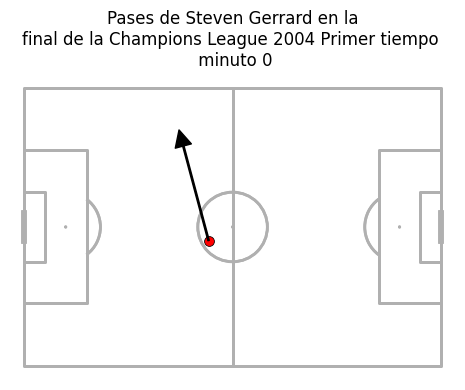

In [49]:
Player_passes("Steven Gerrard", 1, 0)

In [50]:
Player_passes("Jerzy Dudek", 1, 120)

No se encontraron pases para el jugador Jerzy Dudek en el Primer tiempo minuto 120.


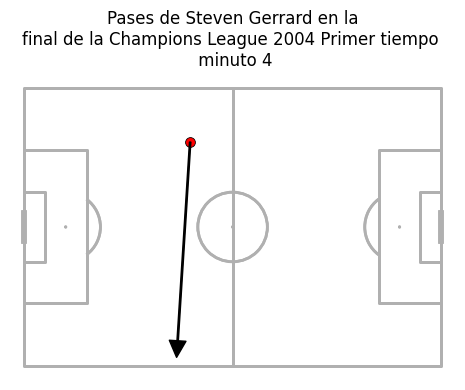

In [51]:
Player_passes("Steven Gerrard", 1, 4)